In [ ]:
import numpy as np
import sys
sys.path.append('/eagle/fthmc/run')
from Scaling_FT_HMC.utils.func import auto_from_chi
from lametlat.utils.plot_settings import *

n_steps = 10

### L32 b6

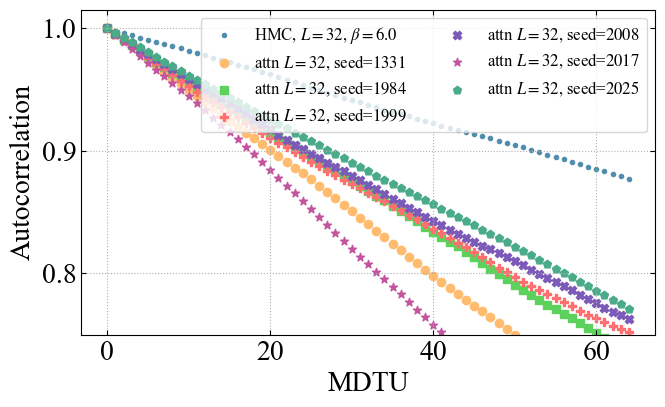

In [ ]:
hmc_L32_b6_topo = np.loadtxt(f'/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_hmc_L32_beta6.0_nsteps{n_steps}.csv')

fthmc_attn_L32_b6_topo_1029 = np.loadtxt(f'/eagle/fthmc/run/Scaling_FT_HMC/attn_evaluation/dumps/topo_fthmc_L32_beta6.0_nsteps{n_steps}_attn_train_b3.0_L32_1029.csv')
fthmc_attn_L32_b6_topo_1107 = np.loadtxt(f'/eagle/fthmc/run/Scaling_FT_HMC/attn_evaluation/dumps/topo_fthmc_L32_beta6.0_nsteps{n_steps}_attn_train_b3.0_L32_1107.csv')
fthmc_attn_L32_b6_topo_1331 = np.loadtxt(f'/eagle/fthmc/run/Scaling_FT_HMC/attn_evaluation/dumps/topo_fthmc_L32_beta6.0_nsteps{n_steps}_attn_train_b3.0_L32_1331.csv')
fthmc_attn_L32_b6_topo_1984 = np.loadtxt(f'/eagle/fthmc/run/Scaling_FT_HMC/attn_evaluation/dumps/topo_fthmc_L32_beta6.0_nsteps{n_steps}_attn_train_b3.0_L32_1984.csv')
fthmc_attn_L32_b6_topo_1999 = np.loadtxt(f'/eagle/fthmc/run/Scaling_FT_HMC/attn_evaluation/dumps/topo_fthmc_L32_beta6.0_nsteps{n_steps}_attn_train_b3.0_L32_1999.csv')
fthmc_attn_L32_b6_topo_2008 = np.loadtxt(f'/eagle/fthmc/run/Scaling_FT_HMC/attn_evaluation/dumps/topo_fthmc_L32_beta6.0_nsteps{n_steps}_attn_train_b3.0_L32_2008.csv')
fthmc_attn_L32_b6_topo_2017 = np.loadtxt(f'/eagle/fthmc/run/Scaling_FT_HMC/attn_evaluation/dumps/topo_fthmc_L32_beta6.0_nsteps{n_steps}_attn_train_b3.0_L32_2017.csv')
fthmc_attn_L32_b6_topo_2025 = np.loadtxt(f'/eagle/fthmc/run/Scaling_FT_HMC/attn_evaluation/dumps/topo_fthmc_L32_beta6.0_nsteps{n_steps}_attn_train_b3.0_L32_2025.csv')

max_lag = 64
beta = 6.0
volume = 32**2

hmc_L32_b6_auto = auto_from_chi(hmc_L32_b6_topo, max_lag=max_lag, beta=beta, volume=volume)

fthmc_attn_L32_b6_auto_1029 = auto_from_chi(fthmc_attn_L32_b6_topo_1029, max_lag=max_lag, beta=beta, volume=volume)
fthmc_attn_L32_b6_auto_1107 = auto_from_chi(fthmc_attn_L32_b6_topo_1107, max_lag=max_lag, beta=beta, volume=volume)
fthmc_attn_L32_b6_auto_1331 = auto_from_chi(fthmc_attn_L32_b6_topo_1331, max_lag=max_lag, beta=beta, volume=volume)
fthmc_attn_L32_b6_auto_1984 = auto_from_chi(fthmc_attn_L32_b6_topo_1984, max_lag=max_lag, beta=beta, volume=volume)
fthmc_attn_L32_b6_auto_1999 = auto_from_chi(fthmc_attn_L32_b6_topo_1999, max_lag=max_lag, beta=beta, volume=volume)
fthmc_attn_L32_b6_auto_2008 = auto_from_chi(fthmc_attn_L32_b6_topo_2008, max_lag=max_lag, beta=beta, volume=volume)
fthmc_attn_L32_b6_auto_2017 = auto_from_chi(fthmc_attn_L32_b6_topo_2017, max_lag=max_lag, beta=beta, volume=volume)
fthmc_attn_L32_b6_auto_2025 = auto_from_chi(fthmc_attn_L32_b6_topo_2025, max_lag=max_lag, beta=beta, volume=volume)


fig, ax = default_plot()
ax.scatter(np.arange(len(hmc_L32_b6_auto)), hmc_L32_b6_auto, label='HMC, $L=32$, $\\beta=6.0$', marker=marker_ls[0], color=color_ls[0])
ax.scatter(np.arange(len(fthmc_attn_L32_b6_auto_1029)), fthmc_attn_L32_b6_auto_1029, label='attn $L=32$, seed=$1029$', marker=marker_ls[1], color=color_ls[1])
ax.scatter(np.arange(len(fthmc_attn_L32_b6_auto_1107)), fthmc_attn_L32_b6_auto_1107, label='attn $L=32$, seed=$1107$', marker=marker_ls[2], color=color_ls[2])
ax.scatter(np.arange(len(fthmc_attn_L32_b6_auto_1331)), fthmc_attn_L32_b6_auto_1331, label='attn $L=32$, seed=$1331$', marker=marker_ls[3], color=color_ls[3])
ax.scatter(np.arange(len(fthmc_attn_L32_b6_auto_1984)), fthmc_attn_L32_b6_auto_1984, label='attn $L=32$, seed=$1984$', marker=marker_ls[4], color=color_ls[4])
ax.scatter(np.arange(len(fthmc_attn_L32_b6_auto_1999)), fthmc_attn_L32_b6_auto_1999, label='attn $L=32$, seed=$1999$', marker=marker_ls[5], color=color_ls[5])
ax.scatter(np.arange(len(fthmc_attn_L32_b6_auto_2008)), fthmc_attn_L32_b6_auto_2008, label='attn $L=32$, seed=$2008$', marker=marker_ls[6], color=color_ls[6])
ax.scatter(np.arange(len(fthmc_attn_L32_b6_auto_2017)), fthmc_attn_L32_b6_auto_2017, label='attn $L=32$, seed=$2017$', marker=marker_ls[7], color=color_ls[7])
ax.scatter(np.arange(len(fthmc_attn_L32_b6_auto_2025)), fthmc_attn_L32_b6_auto_2025, label='attn $L=32$, seed=$2025$', marker=marker_ls[8], color=color_ls[8])


ax.set_ylim(0.75, 1.015)
ax.legend(ncol=2, loc='upper right', fontsize=12)
ax.set_xlabel('MDTU', **fs_p)
ax.set_ylabel('Autocorrelation', **fs_p)
plt.tight_layout()
plt.savefig('plots/attn_train_b3_L32_autocorrelation_L32_b6.pdf', transparent=True)
plt.show()


In [ ]:

gamma_hmc = 1 / (1 - hmc_L32_b6_auto[16])

gamma_fthmc_1029 = 1 / (1 - fthmc_attn_L32_b6_auto_1029[16])
gamma_fthmc_1107 = 1 / (1 - fthmc_attn_L32_b6_auto_1107[16])
gamma_fthmc_1331 = 1 / (1 - fthmc_attn_L32_b6_auto_1331[16])
gamma_fthmc_1984 = 1 / (1 - fthmc_attn_L32_b6_auto_1984[16])
gamma_fthmc_1999 = 1 / (1 - fthmc_attn_L32_b6_auto_1999[16])
gamma_fthmc_2008 = 1 / (1 - fthmc_attn_L32_b6_auto_2008[16])
gamma_fthmc_2017 = 1 / (1 - fthmc_attn_L32_b6_auto_2017[16])
gamma_fthmc_2025 = 1 / (1 - fthmc_attn_L32_b6_auto_2025[16])


gamma_ratio_1029 = gamma_hmc / gamma_fthmc_1029
gamma_ratio_1107 = gamma_hmc / gamma_fthmc_1107
gamma_ratio_1331 = gamma_hmc / gamma_fthmc_1331
gamma_ratio_1984 = gamma_hmc / gamma_fthmc_1984
gamma_ratio_1999 = gamma_hmc / gamma_fthmc_1999
gamma_ratio_2008 = gamma_hmc / gamma_fthmc_2008
gamma_ratio_2017 = gamma_hmc / gamma_fthmc_2017
gamma_ratio_2025 = gamma_hmc / gamma_fthmc_2025

gamma_ratio_L32_b6_mean = np.mean([gamma_ratio_1029, gamma_ratio_1107, gamma_ratio_1331, gamma_ratio_1984, gamma_ratio_1999, gamma_ratio_2008, gamma_ratio_2017, gamma_ratio_2025])
gamma_ratio_L32_b6_std = np.std([gamma_ratio_1029, gamma_ratio_1107, gamma_ratio_1331, gamma_ratio_1984, gamma_ratio_1999, gamma_ratio_2008, gamma_ratio_2017, gamma_ratio_2025])


print(">>> gamma ratio (16)")
print(f"gamma ratio (16) for L32 b6: {gamma_ratio_1029}, {gamma_ratio_1107}, {gamma_ratio_1331}, {gamma_ratio_1984}, {gamma_ratio_1999}, {gamma_ratio_2008}, {gamma_ratio_2017}, {gamma_ratio_2025}")
print(f"mean(16) for L32 b6: {gamma_ratio_L32_b6_mean}")
print(f"std(16) for L32 b6: {gamma_ratio_L32_b6_std}")

deltaQ_hmc = [ abs(hmc_L32_b6_topo[i] - hmc_L32_b6_topo[i-1]) for i in range(1, len(hmc_L32_b6_topo))]
deltaQ_fthmc_1029 = [ abs(fthmc_attn_L32_b6_topo_1029[i] - fthmc_attn_L32_b6_topo_1029[i-1]) for i in range(1, len(fthmc_attn_L32_b6_topo_1029))]
deltaQ_fthmc_1107 = [ abs(fthmc_attn_L32_b6_topo_1107[i] - fthmc_attn_L32_b6_topo_1107[i-1]) for i in range(1, len(fthmc_attn_L32_b6_topo_1107))]
deltaQ_fthmc_1331 = [ abs(fthmc_attn_L32_b6_topo_1331[i] - fthmc_attn_L32_b6_topo_1331[i-1]) for i in range(1, len(fthmc_attn_L32_b6_topo_1331))]
deltaQ_fthmc_1984 = [ abs(fthmc_attn_L32_b6_topo_1984[i] - fthmc_attn_L32_b6_topo_1984[i-1]) for i in range(1, len(fthmc_attn_L32_b6_topo_1984))]
deltaQ_fthmc_1999 = [ abs(fthmc_attn_L32_b6_topo_1999[i] - fthmc_attn_L32_b6_topo_1999[i-1]) for i in range(1, len(fthmc_attn_L32_b6_topo_1999))]
deltaQ_fthmc_2008 = [ abs(fthmc_attn_L32_b6_topo_2008[i] - fthmc_attn_L32_b6_topo_2008[i-1]) for i in range(1, len(fthmc_attn_L32_b6_topo_2008))]
deltaQ_fthmc_2017 = [ abs(fthmc_attn_L32_b6_topo_2017[i] - fthmc_attn_L32_b6_topo_2017[i-1]) for i in range(1, len(fthmc_attn_L32_b6_topo_2017))]
deltaQ_fthmc_2025 = [ abs(fthmc_attn_L32_b6_topo_2025[i] - fthmc_attn_L32_b6_topo_2025[i-1]) for i in range(1, len(fthmc_attn_L32_b6_topo_2025))]

deltaQ_hmc_L32_b6_mean = np.mean(deltaQ_hmc)
deltaQ_fthmc_L32_b6_mean = np.mean([np.mean(deltaQ_fthmc_1029), np.mean(deltaQ_fthmc_1107), np.mean(deltaQ_fthmc_1331), np.mean(deltaQ_fthmc_1984), np.mean(deltaQ_fthmc_1999), np.mean(deltaQ_fthmc_2008), np.mean(deltaQ_fthmc_2017), np.mean(deltaQ_fthmc_2025)])
deltaQ_fthmc_L32_b6_std = np.std([np.mean(deltaQ_fthmc_1029), np.mean(deltaQ_fthmc_1107), np.mean(deltaQ_fthmc_1331), np.mean(deltaQ_fthmc_1984), np.mean(deltaQ_fthmc_1999), np.mean(deltaQ_fthmc_2008), np.mean(deltaQ_fthmc_2017), np.mean(deltaQ_fthmc_2025)])

print("\n>>> deltaQ")
print(f"deltaQ ratio for HMC L32 b6: {np.mean(deltaQ_hmc)}")
print(f"deltaQ for FTHMC L32 b6: {np.mean(deltaQ_fthmc_1029)}, {np.mean(deltaQ_fthmc_1107)}, {np.mean(deltaQ_fthmc_1331)}, {np.mean(deltaQ_fthmc_1984)}, {np.mean(deltaQ_fthmc_1999)}, {np.mean(deltaQ_fthmc_2008)}, {np.mean(deltaQ_fthmc_2017)}, {np.mean(deltaQ_fthmc_2025)}")
print(f"mean(deltaQ) ratio for FTHMC L32 b6: {deltaQ_fthmc_L32_b6_mean / deltaQ_hmc_L32_b6_mean}")
print(f"std(deltaQ) ratio for FTHMC L32 b6: {deltaQ_fthmc_L32_b6_std / deltaQ_hmc_L32_b6_mean}")

>>> gamma ratio (16)
gamma ratio (16) for L32 b6: 2.7006039689387435, 2.3563416738567753, 2.4512510785159645, 2.1915444348576387, 3.0474547023295973, 2.033649698015531
mean(16) for L32 b6: 2.463474259419042
std(16) for L32 b6: 0.33356294682095317

>>> deltaQ
deltaQ ratio for HMC L32 b6: 0.021001221001221003
deltaQ for FTHMC L32 b6: 0.04151404151404151, 0.038583638583638585, 0.039316239316239315, 0.03907203907203907, 0.04566544566544566, 0.033455433455433455
mean(deltaQ) ratio for FTHMC L32 b6: 1.8856589147286817
std(deltaQ) ratio for FTHMC L32 b6: 0.17343607846380135


### L64 b6

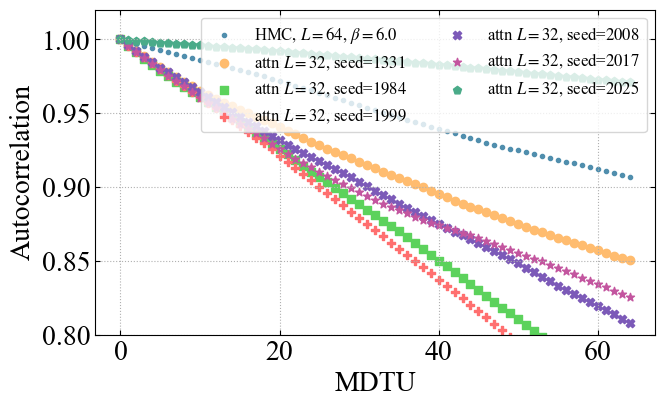

In [ ]:
hmc_L64_b6_topo = np.loadtxt(f'/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_hmc_L64_beta6.0_nsteps{n_steps}.csv')

fthmc_attn_L64_b6_topo_1029 = np.loadtxt(f'/eagle/fthmc/run/Scaling_FT_HMC/attn_evaluation/dumps/topo_fthmc_L64_beta6.0_nsteps{n_steps}_attn_train_b3.0_L32_1029.csv')
fthmc_attn_L64_b6_topo_1107 = np.loadtxt(f'/eagle/fthmc/run/Scaling_FT_HMC/attn_evaluation/dumps/topo_fthmc_L64_beta6.0_nsteps{n_steps}_attn_train_b3.0_L32_1107.csv')
fthmc_attn_L64_b6_topo_1331 = np.loadtxt(f'/eagle/fthmc/run/Scaling_FT_HMC/attn_evaluation/dumps/topo_fthmc_L64_beta6.0_nsteps{n_steps}_attn_train_b3.0_L32_1331.csv')
fthmc_attn_L64_b6_topo_1984 = np.loadtxt(f'/eagle/fthmc/run/Scaling_FT_HMC/attn_evaluation/dumps/topo_fthmc_L64_beta6.0_nsteps{n_steps}_attn_train_b3.0_L32_1984.csv')
fthmc_attn_L64_b6_topo_1999 = np.loadtxt(f'/eagle/fthmc/run/Scaling_FT_HMC/attn_evaluation/dumps/topo_fthmc_L64_beta6.0_nsteps{n_steps}_attn_train_b3.0_L32_1999.csv')
fthmc_attn_L64_b6_topo_2008 = np.loadtxt(f'/eagle/fthmc/run/Scaling_FT_HMC/attn_evaluation/dumps/topo_fthmc_L64_beta6.0_nsteps{n_steps}_attn_train_b3.0_L32_2008.csv')
fthmc_attn_L64_b6_topo_2017 = np.loadtxt(f'/eagle/fthmc/run/Scaling_FT_HMC/attn_evaluation/dumps/topo_fthmc_L64_beta6.0_nsteps{n_steps}_attn_train_b3.0_L32_2017.csv')
fthmc_attn_L64_b6_topo_2025 = np.loadtxt(f'/eagle/fthmc/run/Scaling_FT_HMC/attn_evaluation/dumps/topo_fthmc_L64_beta6.0_nsteps{n_steps}_attn_train_b3.0_L32_2025.csv')

max_lag = 64
beta = 6.0
volume = 64**2

hmc_L64_b6_auto = auto_from_chi(hmc_L64_b6_topo, max_lag=max_lag, beta=beta, volume=volume)

fthmc_attn_L64_b6_auto_1029 = auto_from_chi(fthmc_attn_L64_b6_topo_1029, max_lag=max_lag, beta=beta, volume=volume)
fthmc_attn_L64_b6_auto_1107 = auto_from_chi(fthmc_attn_L64_b6_topo_1107, max_lag=max_lag, beta=beta, volume=volume)
fthmc_attn_L64_b6_auto_1331 = auto_from_chi(fthmc_attn_L64_b6_topo_1331, max_lag=max_lag, beta=beta, volume=volume)
fthmc_attn_L64_b6_auto_1984 = auto_from_chi(fthmc_attn_L64_b6_topo_1984, max_lag=max_lag, beta=beta, volume=volume)
fthmc_attn_L64_b6_auto_1999 = auto_from_chi(fthmc_attn_L64_b6_topo_1999, max_lag=max_lag, beta=beta, volume=volume)
fthmc_attn_L64_b6_auto_2008 = auto_from_chi(fthmc_attn_L64_b6_topo_2008, max_lag=max_lag, beta=beta, volume=volume)
fthmc_attn_L64_b6_auto_2017 = auto_from_chi(fthmc_attn_L64_b6_topo_2017, max_lag=max_lag, beta=beta, volume=volume)
fthmc_attn_L64_b6_auto_2025 = auto_from_chi(fthmc_attn_L64_b6_topo_2025, max_lag=max_lag, beta=beta, volume=volume)


fig, ax = default_plot()
ax.scatter(np.arange(len(hmc_L64_b6_auto)), hmc_L64_b6_auto, label='HMC, $L=64$, $\\beta=6.0$', marker=marker_ls[0], color=color_ls[0])

ax.scatter(np.arange(len(fthmc_attn_L64_b6_auto_1029)), fthmc_attn_L64_b6_auto_1029, label='attn $L=32$, seed=$1029$', marker=marker_ls[1], color=color_ls[1])
ax.scatter(np.arange(len(fthmc_attn_L64_b6_auto_1107)), fthmc_attn_L64_b6_auto_1107, label='attn $L=32$, seed=$1107$', marker=marker_ls[2], color=color_ls[2])
ax.scatter(np.arange(len(fthmc_attn_L64_b6_auto_1331)), fthmc_attn_L64_b6_auto_1331, label='attn $L=32$, seed=$1331$', marker=marker_ls[1], color=color_ls[1])
ax.scatter(np.arange(len(fthmc_attn_L64_b6_auto_1984)), fthmc_attn_L64_b6_auto_1984, label='attn $L=32$, seed=$1984$', marker=marker_ls[4], color=color_ls[4])
ax.scatter(np.arange(len(fthmc_attn_L64_b6_auto_1999)), fthmc_attn_L64_b6_auto_1999, label='attn $L=32$, seed=$1999$', marker=marker_ls[5], color=color_ls[5])
ax.scatter(np.arange(len(fthmc_attn_L64_b6_auto_2008)), fthmc_attn_L64_b6_auto_2008, label='attn $L=32$, seed=$2008$', marker=marker_ls[6], color=color_ls[6])
ax.scatter(np.arange(len(fthmc_attn_L64_b6_auto_2017)), fthmc_attn_L64_b6_auto_2017, label='attn $L=32$, seed=$2017$', marker=marker_ls[7], color=color_ls[7])
ax.scatter(np.arange(len(fthmc_attn_L64_b6_auto_2025)), fthmc_attn_L64_b6_auto_2025, label='attn $L=32$, seed=$2025$', marker=marker_ls[8], color=color_ls[8])


ax.set_ylim(0.8, 1.02)
ax.legend(ncol=2, loc='upper right', fontsize=12)
ax.set_xlabel('MDTU', **fs_p)
ax.set_ylabel('Autocorrelation', **fs_p)
plt.tight_layout()
plt.savefig('plots/attn_train_b3_L32_autocorrelation_L64_b6.pdf', transparent=True)
plt.show()


In [ ]:
idx = 16

gamma_hmc = 1 / (1 - hmc_L64_b6_auto[idx])

gamma_fthmc_1029 = 1 / (1 - fthmc_attn_L64_b6_auto_1029[idx])
gamma_fthmc_1107 = 1 / (1 - fthmc_attn_L64_b6_auto_1107[idx])
gamma_fthmc_1331 = 1 / (1 - fthmc_attn_L64_b6_auto_1331[idx])
gamma_fthmc_1984 = 1 / (1 - fthmc_attn_L64_b6_auto_1984[idx])
gamma_fthmc_1999 = 1 / (1 - fthmc_attn_L64_b6_auto_1999[idx])
gamma_fthmc_2008 = 1 / (1 - fthmc_attn_L64_b6_auto_2008[idx])
gamma_fthmc_2017 = 1 / (1 - fthmc_attn_L64_b6_auto_2017[idx])
gamma_fthmc_2025 = 1 / (1 - fthmc_attn_L64_b6_auto_2025[idx])

gamma_ratio_1029 = gamma_hmc / gamma_fthmc_1029
gamma_ratio_1107 = gamma_hmc / gamma_fthmc_1107
gamma_ratio_1331 = gamma_hmc / gamma_fthmc_1331
gamma_ratio_1984 = gamma_hmc / gamma_fthmc_1984
gamma_ratio_1999 = gamma_hmc / gamma_fthmc_1999
gamma_ratio_2008 = gamma_hmc / gamma_fthmc_2008
gamma_ratio_2017 = gamma_hmc / gamma_fthmc_2017
gamma_ratio_2025 = gamma_hmc / gamma_fthmc_2025

gamma_ratio_L64_b6_mean = np.mean([gamma_ratio_1029, gamma_ratio_1107, gamma_ratio_1331, gamma_ratio_1984, gamma_ratio_1999, gamma_ratio_2008, gamma_ratio_2017, gamma_ratio_2025])
gamma_ratio_L64_b6_std = np.std([gamma_ratio_1029, gamma_ratio_1107, gamma_ratio_1331, gamma_ratio_1984, gamma_ratio_1999, gamma_ratio_2008, gamma_ratio_2017, gamma_ratio_2025])


print(f">>> gamma ratio ({idx})")
print(f"gamma ratio ({idx}) for L64 b6: {gamma_ratio_1029}, {gamma_ratio_1107}, {gamma_ratio_1331}, {gamma_ratio_1984}, {gamma_ratio_1999}, {gamma_ratio_2008}, {gamma_ratio_2017}, {gamma_ratio_2025}")
print(f"mean({idx}) for L64 b6: {gamma_ratio_L64_b6_mean}")
print(f"std({idx}) for L64 b6: {gamma_ratio_L64_b6_std}")

deltaQ_hmc = [ abs(hmc_L64_b6_topo[i] - hmc_L64_b6_topo[i-1]) for i in range(1, len(hmc_L64_b6_topo))]

deltaQ_fthmc_1029 = [ abs(fthmc_attn_L64_b6_topo_1029[i] - fthmc_attn_L64_b6_topo_1029[i-1]) for i in range(1, len(fthmc_attn_L64_b6_topo_1029))]
deltaQ_fthmc_1107 = [ abs(fthmc_attn_L64_b6_topo_1107[i] - fthmc_attn_L64_b6_topo_1107[i-1]) for i in range(1, len(fthmc_attn_L64_b6_topo_1107))]
deltaQ_fthmc_1331 = [ abs(fthmc_attn_L64_b6_topo_1331[i] - fthmc_attn_L64_b6_topo_1331[i-1]) for i in range(1, len(fthmc_attn_L64_b6_topo_1331))]
deltaQ_fthmc_1984 = [ abs(fthmc_attn_L64_b6_topo_1984[i] - fthmc_attn_L64_b6_topo_1984[i-1]) for i in range(1, len(fthmc_attn_L64_b6_topo_1984))]
deltaQ_fthmc_1999 = [ abs(fthmc_attn_L64_b6_topo_1999[i] - fthmc_attn_L64_b6_topo_1999[i-1]) for i in range(1, len(fthmc_attn_L64_b6_topo_1999))]
deltaQ_fthmc_2008 = [ abs(fthmc_attn_L64_b6_topo_2008[i] - fthmc_attn_L64_b6_topo_2008[i-1]) for i in range(1, len(fthmc_attn_L64_b6_topo_2008))]
deltaQ_fthmc_2017 = [ abs(fthmc_attn_L64_b6_topo_2017[i] - fthmc_attn_L64_b6_topo_2017[i-1]) for i in range(1, len(fthmc_attn_L64_b6_topo_2017))]
deltaQ_fthmc_2025 = [ abs(fthmc_attn_L64_b6_topo_2025[i] - fthmc_attn_L64_b6_topo_2025[i-1]) for i in range(1, len(fthmc_attn_L64_b6_topo_2025))]

deltaQ_hmc_L64_b6_mean = np.mean(deltaQ_hmc)
deltaQ_fthmc_L64_b6_mean = np.mean([np.mean(deltaQ_fthmc_1029), np.mean(deltaQ_fthmc_1107), np.mean(deltaQ_fthmc_1331), np.mean(deltaQ_fthmc_1984), np.mean(deltaQ_fthmc_1999), np.mean(deltaQ_fthmc_2008), np.mean(deltaQ_fthmc_2017), np.mean(deltaQ_fthmc_2025)])
deltaQ_fthmc_L64_b6_std = np.std([np.mean(deltaQ_fthmc_1029), np.mean(deltaQ_fthmc_1107), np.mean(deltaQ_fthmc_1331), np.mean(deltaQ_fthmc_1984), np.mean(deltaQ_fthmc_1999), np.mean(deltaQ_fthmc_2008), np.mean(deltaQ_fthmc_2017), np.mean(deltaQ_fthmc_2025)])

print("\n>>> deltaQ")
print(f"deltaQ for HMC L64 b6: {np.mean(deltaQ_hmc)}")
print(f"deltaQ for FTHMC L64 b6: {np.mean(deltaQ_fthmc_1029)}, {np.mean(deltaQ_fthmc_1107)}, {np.mean(deltaQ_fthmc_1331)}, {np.mean(deltaQ_fthmc_1984)}, {np.mean(deltaQ_fthmc_1999)}, {np.mean(deltaQ_fthmc_2008)}, {np.mean(deltaQ_fthmc_2017)}, {np.mean(deltaQ_fthmc_2025)}")
print(f"mean(deltaQ) ratio for FTHMC L64 b6: {deltaQ_fthmc_L64_b6_mean / deltaQ_hmc_L64_b6_mean}")
print(f"std(deltaQ) ratio for FTHMC L64 b6: {deltaQ_fthmc_L64_b6_std / deltaQ_hmc_L64_b6_mean}")

>>> gamma ratio (16)
gamma ratio (16) for L64 b6: 2.25996533795494, 2.688908145580589, 2.8212016175621017, 2.510109763142691, 2.7253032928942806, 0.2905834777585222
mean(16) for L64 b6: 2.216011939148854
std(16) for L64 b6: 0.879863932964615

>>> deltaQ
deltaQ for HMC L64 b6: 0.05518925518925519
deltaQ for FTHMC L64 b6: 0.12796092796092795, 0.1409035409035409, 0.13894993894993896, 0.1347985347985348, 0.1457875457875458, 0.020757020757020756
mean(deltaQ) ratio for FTHMC L64 b6: 2.1415929203539825
std(deltaQ) ratio for FTHMC L64 b6: 0.795779781485289
